In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from src.Calculators.ray_maker import ray_maker
from src.Luminosity.thermR import get_thermr
from src.Luminosity.photosphere import get_photosphere
fix = 844
m = 6
Rt = (10**m)**(1/3)

In [2]:
rays_T, rays_den, _, radii = ray_maker(fix, m)

/Users/paolamartire/miniconda3/envs/tde_comparison/lib/python3.9/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'observers' of function 'THROUPLE_S_CASTERS'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "src/Calculators/legion_of_casters.py", line 12:
@numba.njit
def THROUPLE_S_CASTERS(radii, R,
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


In [3]:
rays_kappa, _, _ = get_photosphere(rays_T, rays_den, radii)

In [4]:
plot_kappa = np.zeros((len(rays_kappa),len(radii)))
for i in range(len(rays_kappa)):
    for j in range(len(rays_kappa[i])):
        temp = rays_kappa[i][j]
        plot_kappa[i][-j-1] = temp
        if temp > 5:
            plot_kappa[i][0:-j] = temp
            break
    plot_kappa[i,0:-j] = temp

In [5]:
step = radii[1]-radii[0]
for j in range(0,len(radii)):
    for i in range(len(plot_kappa)):
        plot_kappa[i,j] /= step

/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_91172/1659112312.py:5: RuntimeWarning: divide by zero encountered in power
  kram = 3.68 * 1e22 * (1 + 0.7389) * data_T**(-3.5) * data_den**2 #Kramers' opacity [cm^2/g]
/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_91172/1659112312.py:5: RuntimeWarning: invalid value encountered in multiply
  kram = 3.68 * 1e22 * (1 + 0.7389) * data_T**(-3.5) * data_den**2 #Kramers' opacity [cm^2/g]


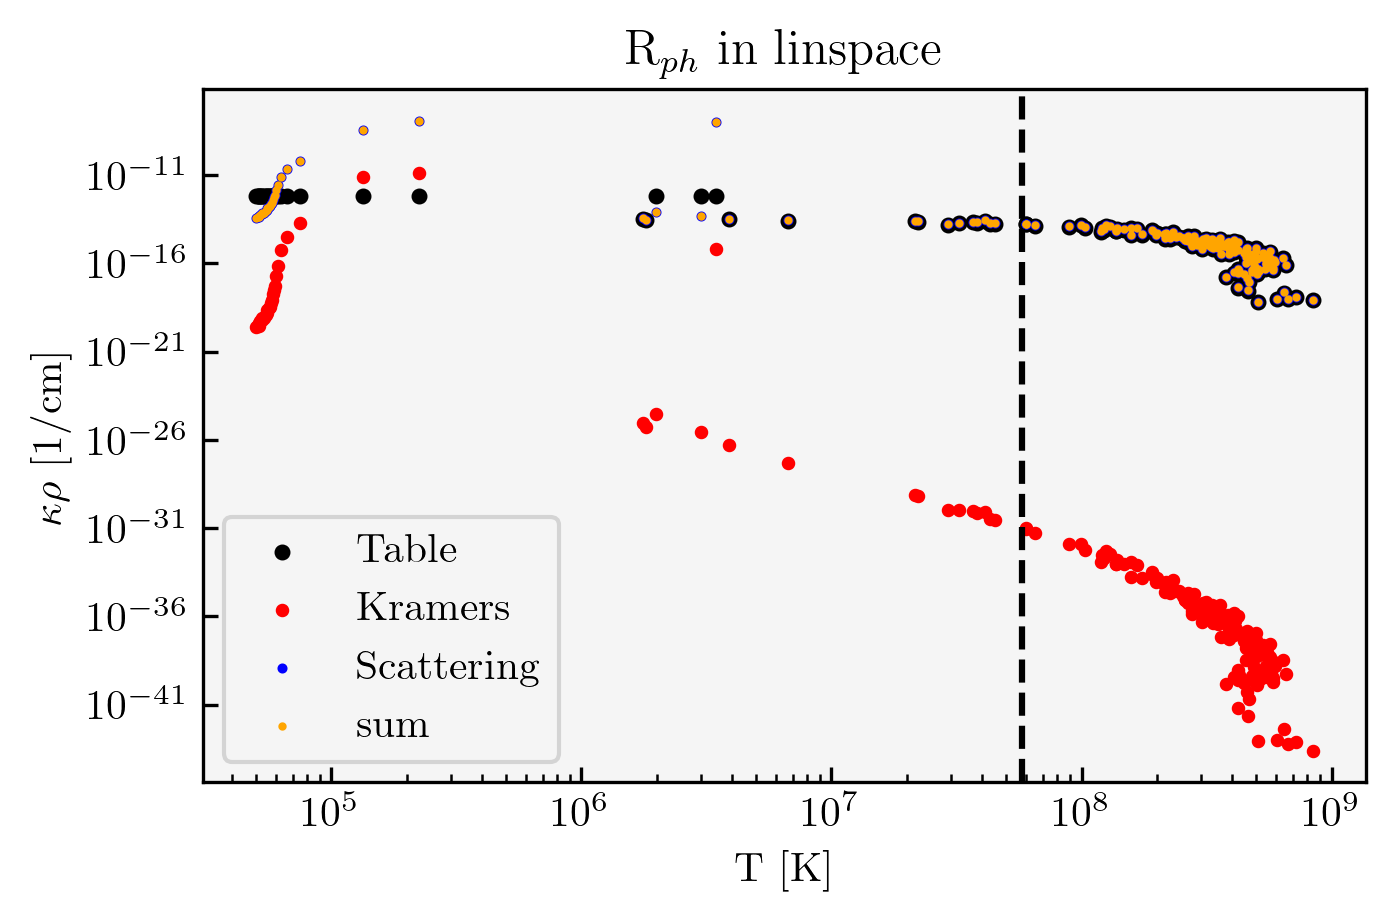

In [6]:
index = 91
data_den = rays_den[index]
data_T = rays_T[index]
kappa_lin = plot_kappa[index]
kram = 3.68 * 1e22 * (1 + 0.7389) * data_T**(-3.5) * data_den**2 #Kramers' opacity [cm^2/g]
scattering_lin = (1+0.7389) * 0.2 * data_den 
sum_lin =  (kram + scattering_lin) 
plt.scatter(data_T,kappa_lin, s = 8, c = 'k', label = 'Table')
plt.scatter(data_T, kram, s = 5, c = 'r', label = 'Kramers')
plt.scatter(data_T, scattering_lin, s = 2, c = 'b', label = 'Scattering')
plt.scatter(data_T,sum_lin, s = 1, c = 'orange', label = 'sum')
plt.legend()
plt.axvline(x=np.exp(17.87), c = 'k', linestyle = 'dashed')
plt.xlabel('T [K]')
plt.ylabel(r'$\kappa\rho$ [1/cm]')
plt.loglog()
plt.title(r'R$_{ph}$ in linspace')
plt.savefig('photosphere_comparison_lin.png')
plt.show()